In [154]:
import numpy as np
import pandas as pd
from matplotlib import pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [155]:
df = pd.read_csv("/content/boston.csv")

In [156]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [158]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [159]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## **EDA**

<Axes: xlabel='AGE'>

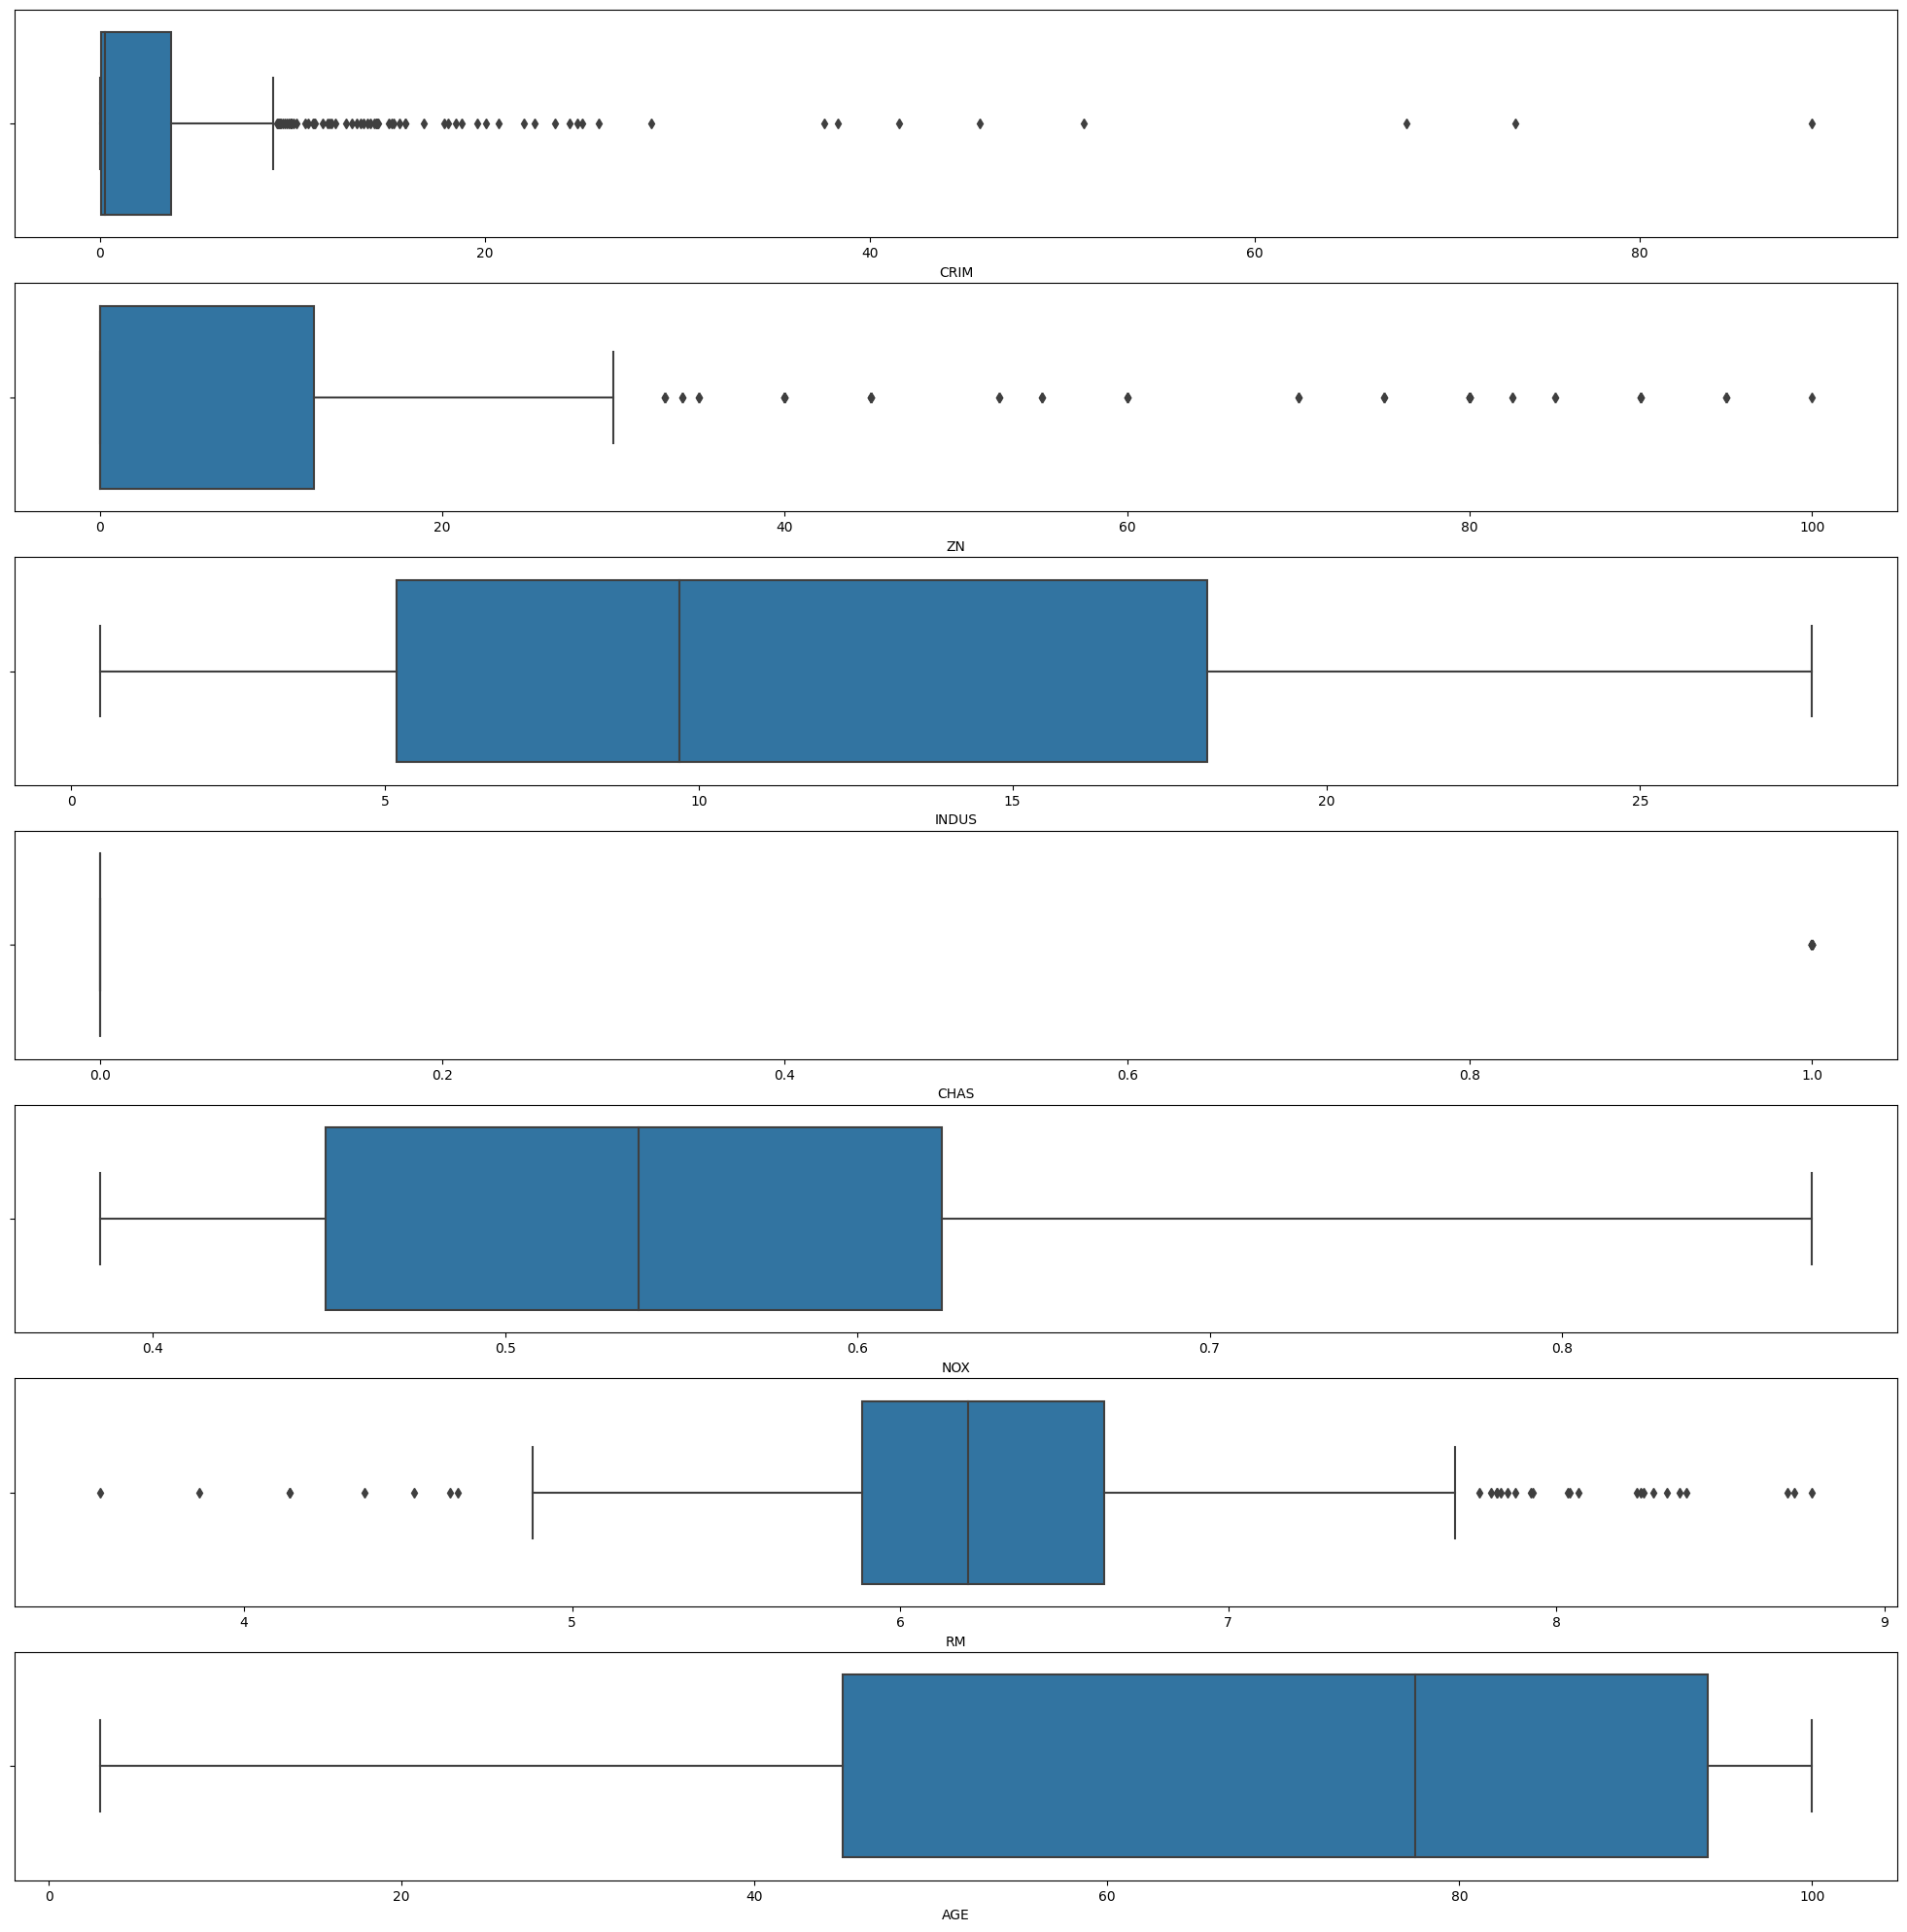

In [160]:
#Visualziing the outliers (if any)
fig, axes = plt.subplots(7,1, figsize = (25,25))
sns.boxplot(x = 'CRIM', data = df, ax = axes[0])
sns.boxplot(x = 'ZN', data = df, ax = axes[1])
sns.boxplot(x = 'INDUS', data = df, ax = axes[2])
sns.boxplot(x = 'CHAS', data = df, ax = axes[3])
sns.boxplot(x = 'NOX', data = df, ax = axes[4])
sns.boxplot(x = 'RM', data = df, ax = axes[5])
sns.boxplot(x = 'AGE', data = df, ax = axes[6])

<Axes: xlabel='LSTAT'>

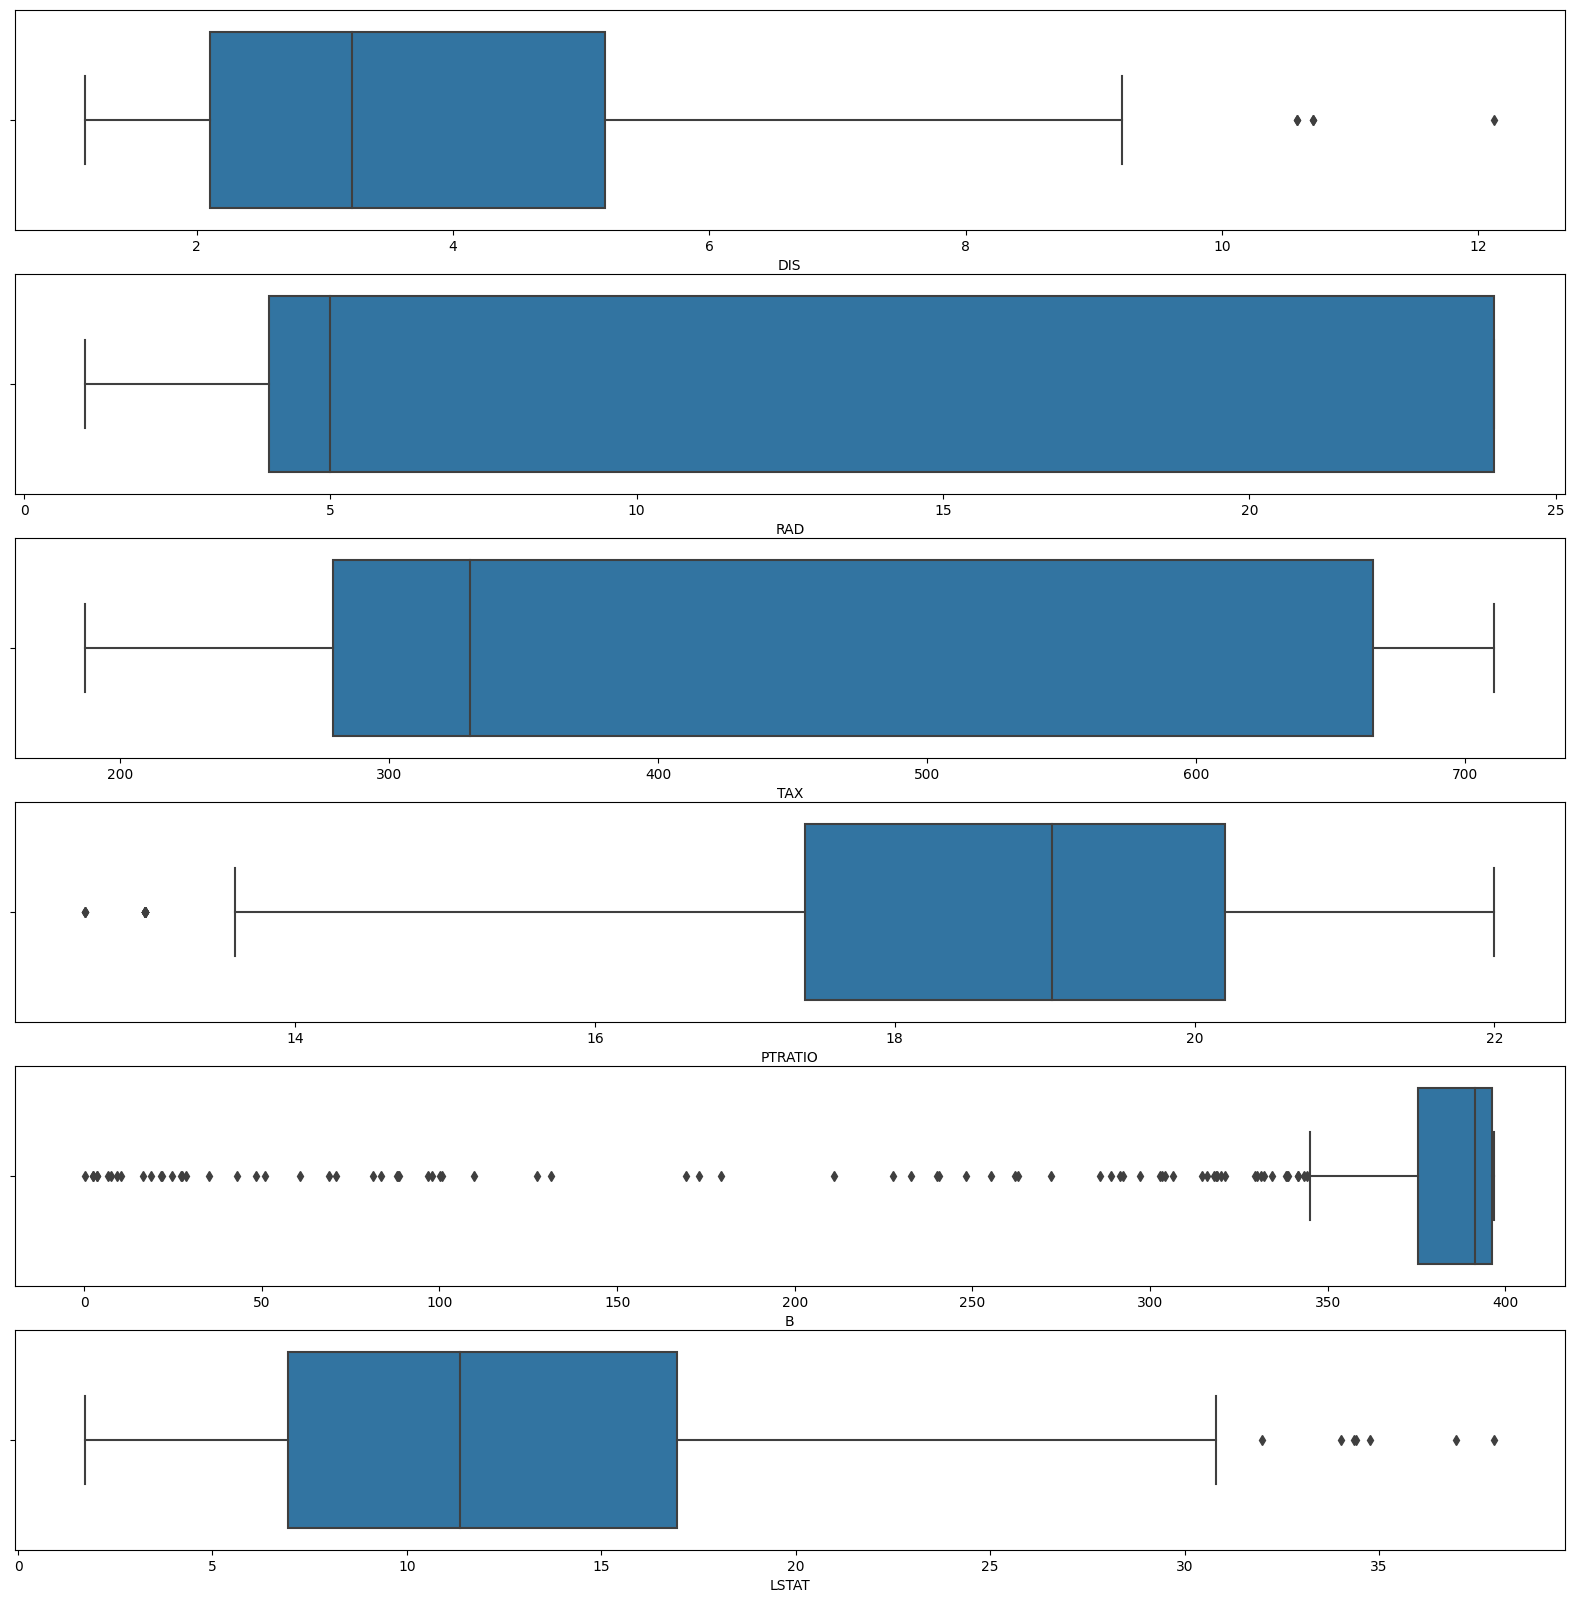

In [161]:
fig, axes = plt.subplots(6,1, figsize = (20,20))
sns.boxplot(x = 'DIS', data = df, ax = axes[0])
sns.boxplot(x = 'RAD', data = df, ax = axes[1])
sns.boxplot(x = 'TAX', data = df, ax = axes[2])
sns.boxplot(x = 'PTRATIO', data = df, ax = axes[3])
sns.boxplot(x = 'B', data = df, ax = axes[4])
sns.boxplot(x = 'LSTAT', data = df, ax = axes[5])

In [162]:
#sns.pairplot(df)

<Axes: >

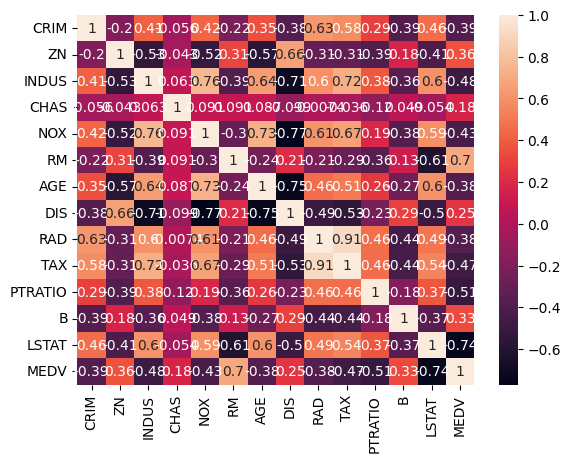

In [163]:
#Analysing correlation
corr = df.corr()
sns.heatmap(corr, annot = True)

In [164]:
threshold = 0.7
corr_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            corr_features.add(colname)

print("Highly correlated features:", corr_features)

#Didn't performed feature selection as the performance was significantly reduced....

Highly correlated features: {'AGE', 'MEDV', 'NOX', 'TAX', 'DIS'}


## **Data Preprocessing**

In [165]:
#removing outliers

col = ['CRIM', 'ZN', 'INDUS',  'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

for col in col:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    u = q3 + 1.5*iqr
    l = q1 - 1.5*iqr
    df[col] = np.where(df[col]>u,u, np.where(df[col]<l,l, df[col]))


In [166]:
#visualizing if the outliers were removed or not...
'''
fig, axes = plt.subplots(13,1, figsize = (45,45))
sns.boxplot(x = 'CRIM', data = df, ax = axes[0])
sns.boxplot(x = 'ZN', data = df, ax = axes[1])
sns.boxplot(x = 'INDUS', data = df, ax = axes[2])
sns.boxplot(x = 'CHAS', data = df, ax = axes[3])
sns.boxplot(x = 'NOX', data = df, ax = axes[4])
sns.boxplot(x = 'RM', data = df, ax = axes[5])
sns.boxplot(x = 'AGE', data = df, ax = axes[6])
sns.boxplot(x = 'DIS', data = df, ax = axes[7])
sns.boxplot(x = 'RAD', data = df, ax = axes[8])
sns.boxplot(x = 'TAX', data = df, ax = axes[9])
sns.boxplot(x = 'PTRATIO', data = df, ax = axes[10])
sns.boxplot(x = 'B', data = df, ax = axes[11])
sns.boxplot(x = 'LSTAT', data = df, ax = axes[12])
'''

"\nfig, axes = plt.subplots(13,1, figsize = (45,45))\nsns.boxplot(x = 'CRIM', data = df, ax = axes[0])\nsns.boxplot(x = 'ZN', data = df, ax = axes[1])\nsns.boxplot(x = 'INDUS', data = df, ax = axes[2])\nsns.boxplot(x = 'CHAS', data = df, ax = axes[3])\nsns.boxplot(x = 'NOX', data = df, ax = axes[4])\nsns.boxplot(x = 'RM', data = df, ax = axes[5])\nsns.boxplot(x = 'AGE', data = df, ax = axes[6])\nsns.boxplot(x = 'DIS', data = df, ax = axes[7])\nsns.boxplot(x = 'RAD', data = df, ax = axes[8])\nsns.boxplot(x = 'TAX', data = df, ax = axes[9])\nsns.boxplot(x = 'PTRATIO', data = df, ax = axes[10])\nsns.boxplot(x = 'B', data = df, ax = axes[11])\nsns.boxplot(x = 'LSTAT', data = df, ax = axes[12])\n"

In [167]:
#Scaling the data
scl = MinMaxScaler()
scl_df = scl.fit_transform(df)
scl_df = pd.DataFrame(scl_df, columns = df.columns)

In [168]:
#seperating the input and target variables
x = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [169]:
#performing train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [170]:
#Random Forest
rf = RandomForestRegressor(random_state=42)

In [171]:
#Gradeient Boosting
gbr = GradientBoostingRegressor(random_state = 42, n_estimators = 300)

In [172]:
#Testing the model using appropriate metrics

reg_tot = [rf, gbr]

for a in reg_tot:
    a.fit(x_train, y_train)
    y_pred = a.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cvs = np.mean(cross_val_score(a, x, y, cv = 5, scoring = 'r2'))

    print(f"Regressor: {a.__class__.__name__}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 score : {r2}")
    print(f"Cross Validation Score: {cvs}")
    print("\n")


Regressor: RandomForestRegressor
MAE: 2.060411764705883
MSE: 8.501317862745092
R2 score : 0.8840736493280398
Cross Validation Score: 0.6343142179140271


Regressor: GradientBoostingRegressor
MAE: 1.8695857955475599
MSE: 6.261399034308591
R2 score : 0.9146178096305237
Cross Validation Score: 0.6253094322679885




Clearly we can see, Boosting provides better performance than Random Forest.

In [174]:
#Deplying the better performing model
import pickle
pickle.dump(gbr, open('Boosting.pkl', 'wb'))
